In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from diffusion import GaussianDiffusion
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import torch
from PIL import Image

In [4]:
path = "./data"
dataset = CIFAR10(root=path, train=True, download=True, transform=v2.Compose([
    v2.ToTensor()
]))

dataloader = DataLoader(dataset, batch_size=1)

/home/ubuntu/.cache/pypoetry/virtualenvs/ddpm-NolEjOLK-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified


In [7]:
def display_image(img):
    """
    batch: (C, H, W)
    """
    figure(figsize=(2, 2))
    img = img.permute((1, 2, 0))
    plt.imshow(img)

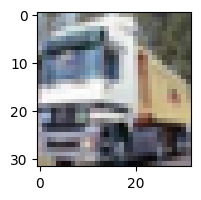

In [8]:
i = 1
img = dataset[i][0]

display_image(img)

In [10]:
beta_start = 0.0001
beta_end = 0.02
T = 1000

diffusion = GaussianDiffusion(
    beta_start=beta_start,
    beta_end=beta_end,
    timesteps=T
)

In [11]:
batch = img.unsqueeze(0)
batch.shape

torch.Size([1, 3, 32, 32])

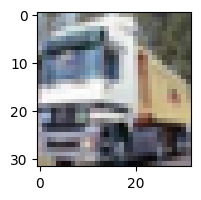

In [54]:
display_image(batch.squeeze(0))

In [61]:
import numpy as np

noise = torch.randn_like(batch)

images = []

for i, t in enumerate(range(0, 1000)):
    sample = diffusion.q_sample(batch, torch.Tensor([t]).long(), noise)
    # img = (sample.squeeze(0).permute((1, 2, 0)).numpy() * 255).astype(np.uint8)
    # img = Image.fromarray(img)

    images.append(sample)
    # images.append(img)

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


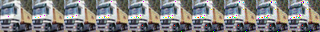

In [58]:
image_grid(images[:10], rows=1, cols=10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


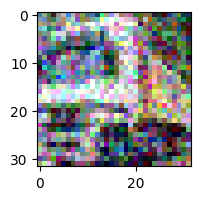

In [76]:
display_image(images[50].squeeze(0))